In [1]:
import numpy as np

f = open("KE.txt", "r")

k_, k_2 = [],[]

line = f.readline()

while line != "": 

    k_.append(float(line.strip().split()[0]))

    k_2.append(float(line.strip().split()[1]))

    line = f.readline()

f.close()

k_ = np.array(k_)

k_2 = np.array(k_2)

In [2]:
def correlation(A): # computes the correlation function for a value A 

    import numpy as np # import numpy library 

    cA = [] # array of autocorrelation times

    cA_0 = 0 # variance at time = 0

    cA_bar = np.mean(np.array(A)) # mean value of A over entire time series

    ### Determine Variance at Time t = 0 ### 

    for i in range(len(A)): 

        cA_0 += (A[i]-cA_bar)**2 # computes sum over variance 
    
    cA_0 = cA_0/(len(A)-1) # divides by the number of samples
    
    for tau in range(len(A)-1): # loop through correlation times

        cA_ = 0 #autocorrelation value 

        for i in range(len(A) - tau):

                cA_ += (A[i]-cA_bar)*(A[i+tau]-cA_bar)
        
        cA_ = cA_ / (len(A) - tau) # normalize by the number of samples

        cA.append(np.array([tau,cA_/cA_0])) # append autocorrelation to array

    return np.array(cA)

In [3]:
def correlation_2(A): 

    import numpy as np

    cA = [] # array of autocorrelation times

    for tau in range(len(A)):  # loop through correlation times

        cA_ = 0 

        for a in (range(len(A) - tau)): # loop through max allowed values 

            cA_ += A[a]*A[a + tau] # compute the sum of products 
        
        cA_ = cA_/(len(A) - tau)
        
        cA.append(np.array([tau,cA_]))
    
    cA = np.array(cA)

    return cA

In [4]:
ke_autocorrelation_2 = correlation_2(k_2)

In [5]:
ke_autocorrelation =  correlation(k_)

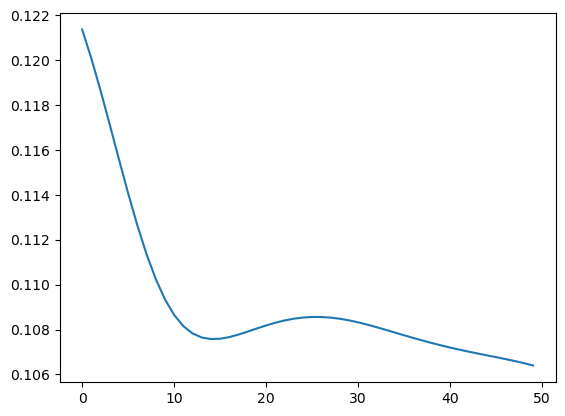

In [6]:
import matplotlib.pyplot as plt

plt.plot(ke_autocorrelation_2[:,0][:50], ke_autocorrelation_2[:,1][:50])

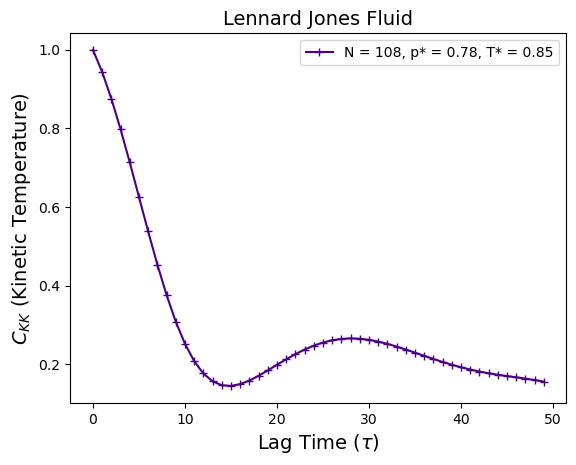

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(ke_autocorrelation[:,0][:50], ke_autocorrelation[:,1][:50], label = "N = 108, p* = 0.78, T* = 0.85", color = "indigo", marker = "+", linestyle = "-")
ax.set_xlabel(r"Lag Time $(\tau)$", fontsize = 14)
ax.set_ylabel(r"$C_{KK}$ (Kinetic Temperature)", fontsize = 14)
ax.set_title("Lennard Jones Fluid", fontsize = 14)
ax.legend()